# Stock Prediction using LSTM

## Importing/Installing  useful modules & Libraries

In [ ]:
pip install yfinance
pip install pandas-datareader

In [ ]:
pip install keras

In [ ]:
pip install tensorflow==2.12.0

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



## Getting data from yahoo_finance

In [2]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()



In [3]:
# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)



In [4]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700,AMAZON
2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000,AMAZON
2023-10-04,126.059998,127.360001,125.680000,127.000000,127.000000,44203900,AMAZON
2023-10-05,126.709999,126.730003,124.330002,125.959999,125.959999,39660600,AMAZON
2023-10-06,124.160004,128.449997,124.129997,127.959999,127.959999,46795900,AMAZON
2023-10-09,126.220001,128.789993,124.760002,128.259995,128.259995,38773700,AMAZON
2023-10-10,128.820007,130.740005,128.050003,129.479996,129.479996,42178600,AMAZON
2023-10-11,129.740005,132.050003,129.610001,131.830002,131.830002,40741800,AMAZON
2023-10-12,132.169998,134.479996,131.229996,132.330002,132.330002,55528600,AMAZON


## Insight related to Dataframe

In [5]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,288.040640,291.197440,285.125679,288.281880,287.201494,2.831525e+07
std,40.505491,40.511970,40.298367,40.328570,40.876966,1.121194e+07
min,217.550003,220.410004,213.429993,214.250000,212.199966,9.200800e+06
25%,247.272495,250.112495,244.570004,247.857498,246.177731,2.129735e+07
50%,286.254990,289.434998,284.245010,288.334991,287.098190,2.582140e+07
75%,327.589989,330.374992,324.485008,327.752510,327.587151,3.104178e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,8.610200e+07


In [6]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-17 to 2023-10-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [7]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [8]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object

In [9]:
df.size

7000

In [10]:
df.shape

(1000, 7)

## Closing Price Line Graph of Stock's

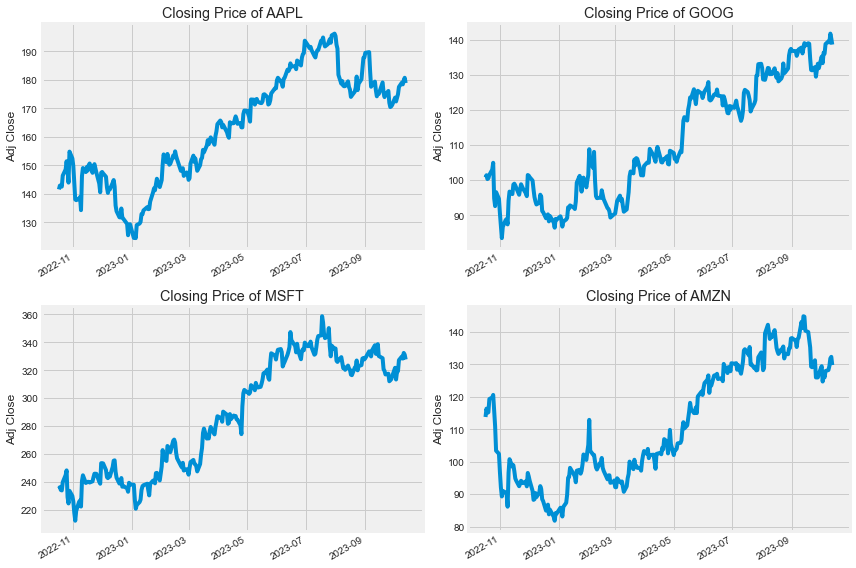

In [11]:
# Let's see a historical view of the closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Daily Return of Stock's

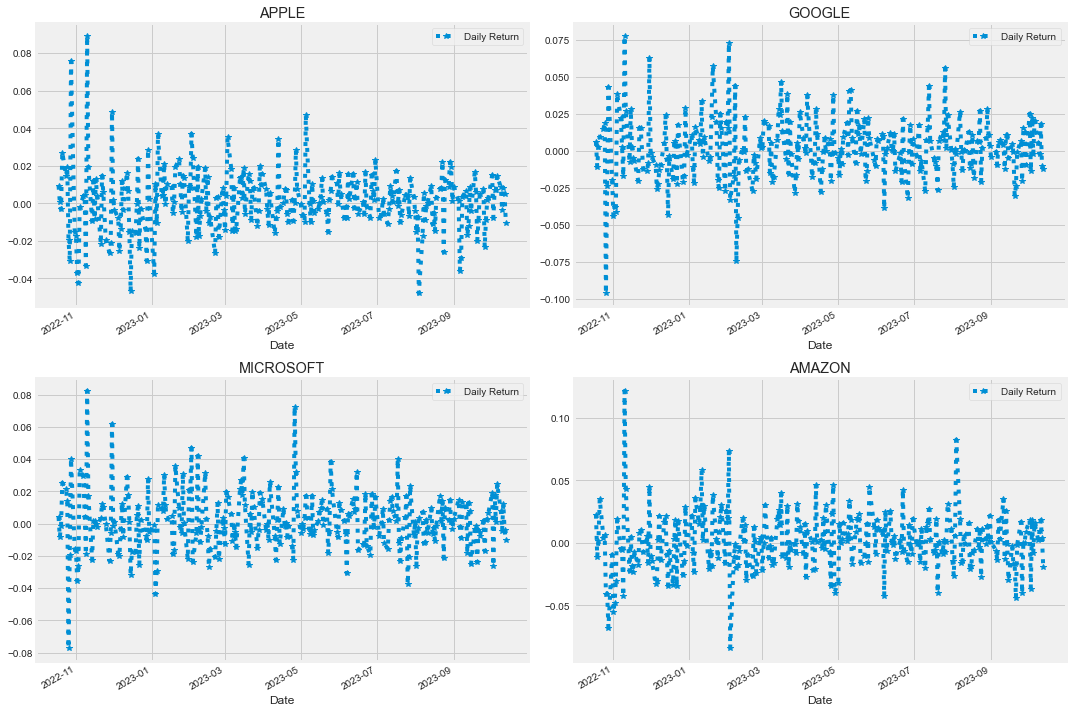

In [12]:
# We'll use pct_change to find the percent change for each day
#  pct_change() function calculates the percentage change between the current and a prior element
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle=':', marker='*')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle=':', marker='*')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle=':', marker='*')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle=':', marker='*')
axes[1,1].set_title('AMAZON')

# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
fig.tight_layout()

## Histogram on Daily return of Stock's

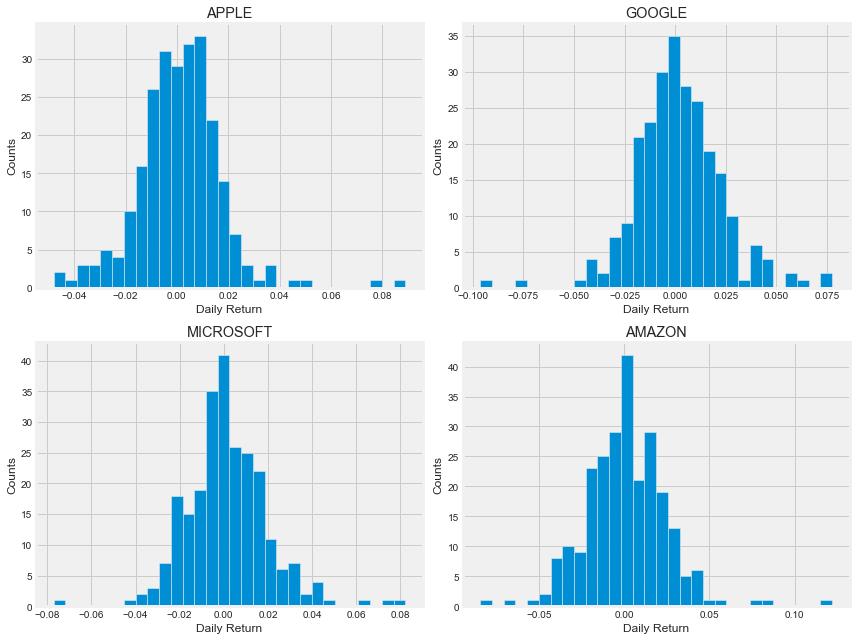

In [13]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
# A histogram displays numerical data by grouping data into "bins" of equal width
    company['Daily Return'].hist(bins=30)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [14]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999728,0.999768,0.999388,0.999378,-0.327156
High,0.999728,1.000000,0.999736,0.999761,0.999732,-0.323611
Low,0.999768,0.999736,1.000000,0.999752,0.999755,-0.331335
Close,0.999388,0.999761,0.999752,1.000000,0.999982,-0.327671
Adj Close,0.999378,0.999732,0.999755,0.999982,1.000000,-0.328113
Volume,-0.327156,-0.323611,-0.331335,-0.327671,-0.328113,1.000000


## Creating TEMP DF of Stock's on closing price 

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-10-17,NaN,NaN,NaN,NaN
2022-10-18,0.009409,0.022585,0.006053,0.004084
2022-10-19,0.000765,-0.011086,-0.010849,-0.008470
2022-10-20,-0.003267,0.001564,0.002393,-0.001395
2022-10-21,0.027059,0.035315,0.009450,0.025281


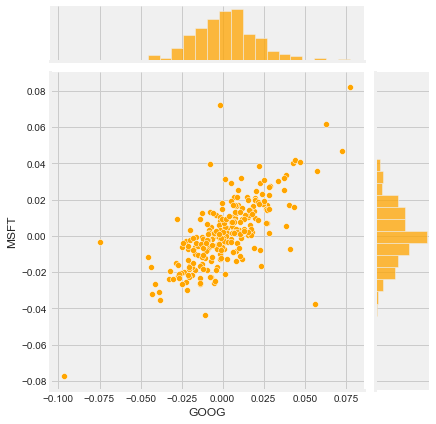

In [16]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter',color='orange')

##  Automatic visual analysis 

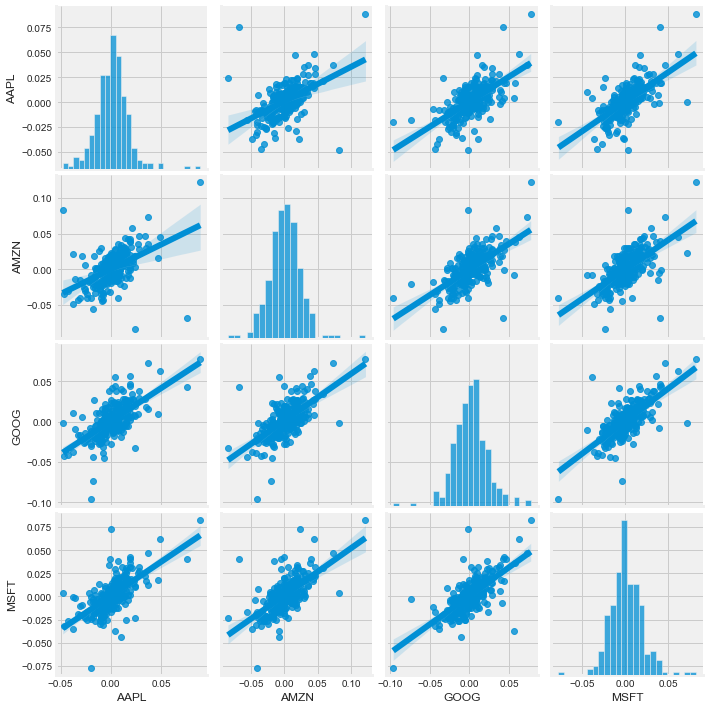

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets, kind='reg')

## Correlation of stock closing price

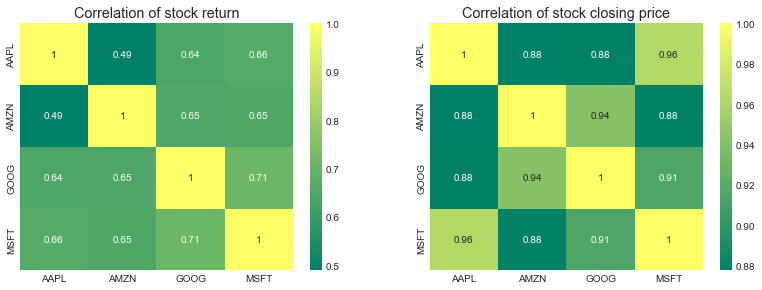

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
# annot to true gives us the numbers in each cell.
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')
plt.show()

# APPLE STOCK ANALYSIS

In [19]:
# Predicting the closing price stock price of APPLE inc
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466091,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533086,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672226,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400


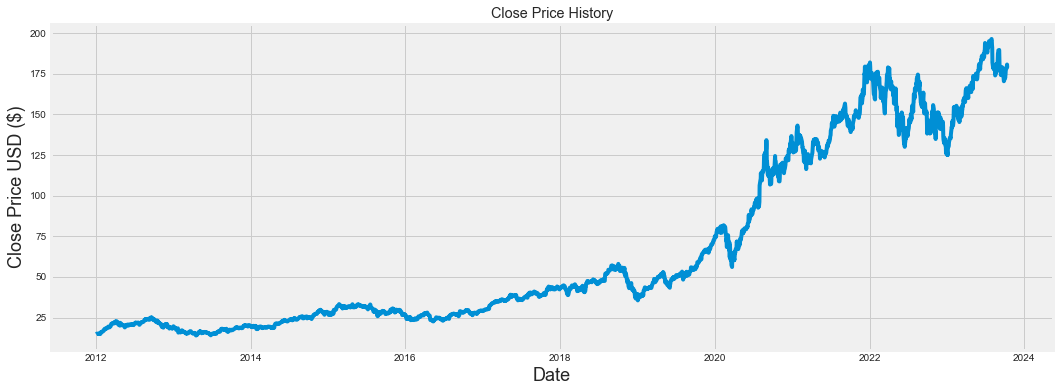

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# ceil() method rounds a number UP to the nearest integer
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2817

In [22]:
df.shape[0]

2965

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.9087684 ],
       [0.91375466],
       [0.90356301]])

## Training & Testing Data

In [24]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        


[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [25]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

# LSTM

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# ETA
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2757/2757 [==============================] - 41s 14ms/step - loss: 0.0012


In [27]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 12ms/step


13.656294577664422

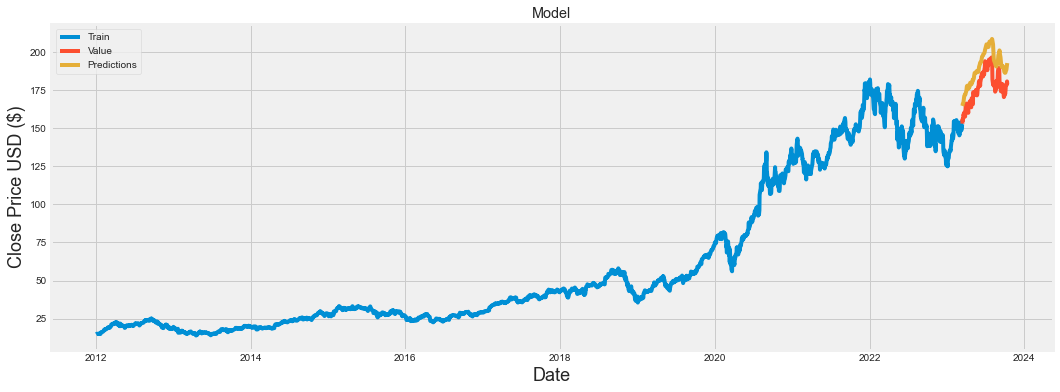

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Value', 'Predictions'], loc='best')
plt.show()

In [32]:
print(valid)

                 Close  Predictions
Date                               
2023-03-15  152.990005   164.622711
2023-03-16  155.850006   165.029877
2023-03-17  155.000000   166.006836
2023-03-20  157.399994   166.882477
2023-03-21  159.279999   168.016266
...                ...          ...
2023-10-09  178.990005   188.447861
2023-10-10  178.389999   189.776611
2023-10-11  179.800003   190.832047
2023-10-12  180.710007   191.834290
2023-10-13  178.850006   192.763367

[148 rows x 2 columns]
